# 국내와 해외 간의 흥행 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

### 제작국가 전처리

In [2]:
movie_all = pd.read_csv("movie_info.csv")

In [3]:
movie_all.tail(5)

,순위,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수,천만까지걸린기간
195,196,신의 한 수,2014-07-03,"범죄,액션",청소년관람불가,한국,"필름,2D",조범구,"정우성,안성기,이범수,김인권,이시영,안길강,최진혁",3566852,0
196,197,코코,2018-01-11,애니메이션,전체관람가,미국,"2D,4D,IMAX",리 언크리치,"가엘 가르시아 베르날,앤서니 곤잘레스,벤자민 브랫",3516880,0
197,198,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세이상관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257,0
198,199,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672,0
199,200,태풍,2005-12-14,"드라마,액션",15세이상관람가,한국,"필름,2D",곽경택,"이정재,이미연,장동건",3471150,0


In [4]:
movie_all["제작국가"].value_counts()

한국               110
미국                74
미국,영국              5
일본                 3
한국,미국              2
미국,호주              2
한국,홍콩              1
한국,체코              1
한국,독일              1
미국,일본,프랑스,캐나다      1
Name: 제작국가, dtype: int64

In [5]:
## 한국 제작 영화 ##
movie_all.loc[movie_all["제작국가"] == "한국", "국가"] = 0
movie_all.loc[movie_all["제작국가"] == "한국,홍콩", "국가"] = 0
movie_all.loc[movie_all["제작국가"] == "한국,체코", "국가"] = 0
movie_all.loc[movie_all["제작국가"] == "한국,미국", "국가"] = 0
movie_all.loc[movie_all["제작국가"] == "한국,독일", "국가"] = 0

In [6]:
## 해외 제작 영화 ##
movie_all.loc[movie_all["제작국가"] == "미국", "국가"] = 1
movie_all.loc[movie_all["제작국가"] == "일본", "국가"] = 1
movie_all.loc[movie_all["제작국가"] == "미국,호주", "국가"] = 1
movie_all.loc[movie_all["제작국가"] == "미국,영국", "국가"] = 1
movie_all.loc[movie_all["제작국가"] == "미국,일본,프랑스,캐나다", "국가"] = 1

In [7]:
movie_all["국가"] = movie_all["국가"].astype(int)

In [8]:
movie_nation = movie_all[["순위", "영화", "장르", "제작국가", "국가", "누적관객수"]]

In [9]:
## 58위까지만 가져오기 ##
movie_nation = movie_nation.head(58)

In [10]:
## check point ##
movie_nation.to_csv("movie_nation.csv", encoding="utf-8", index=False)

### 제작국가와 장르 분석

In [39]:
movie_nation = pd.read_csv("movie_nation.csv", encoding="euc-kr")

In [40]:
movie_nation[movie_nation['국가']==1]

,순위,영화,장르,제작국가,국가,누적관객수
4,5,어벤져스- 엔드게임,"액션,SF",미국,1,13977602
5,6,겨울왕국 2,애니메이션,미국,1,13750668
7,8,아바타,"SF,액션,어드벤처",미국,1,13338863
10,11,알라딘,"어드벤처,가족,판타지",미국,1,12797927
20,21,어벤져스- 인피니티 워,"액션,어드벤처,판타지,SF",미국,1,11233176
23,24,아바타- 물의 길,"액션,어드벤처,SF,스릴러",미국,1,10802350
25,26,어벤져스- 에이지 오브 울트론,"액션,어드벤처,판타지,SF",미국,1,10504487
26,27,인터스텔라,SF,"미국,영국",1,10342523
28,29,겨울왕국,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지",미국,1,10305051
29,30,보헤미안 랩소디,드라마,미국,1,9948386


In [41]:
movie_nation[movie_nation['국가'] == 0]

,순위,영화,장르,제작국가,국가,누적관객수
0,1,명량,"사극,액션",한국,0,17615919
1,2,극한직업,코미디,한국,0,16266338
2,3,신과함께-죄와 벌,"판타지,드라마",한국,0,14414658
3,4,국제시장,드라마,한국,0,14264478
6,7,베테랑,"액션,드라마",한국,0,13414484
8,9,도둑들,"액션,범죄","한국,홍콩",0,12984701
9,10,7번방의 선물,"코미디,드라마",한국,0,12812144
11,12,암살,"액션,드라마",한국,0,12706947
12,13,범죄도시2,"범죄,액션",한국,0,12693415
13,14,"광해, 왕이 된 남자","사극,드라마",한국,0,12324062


In [42]:
genre = pd.read_csv("genre2.csv")

In [43]:
genre.head(3)

,genre,title,audi
0,사극,명량,17615919
1,액션,명량,17615919
2,코미디,극한직업,16266338


In [44]:
## 병합하기 편하게 컬럼명 변경 ##
genre.columns = ["장르", "영화", "누적관객수"]

In [45]:
## 58위까지만 가져오기 ##
genre_58 = genre.head(63)

In [46]:
movie_nation.head(10)

,순위,영화,장르,제작국가,국가,누적관객수
0,1,명량,"사극,액션",한국,0,17615919
1,2,극한직업,코미디,한국,0,16266338
2,3,신과함께-죄와 벌,"판타지,드라마",한국,0,14414658
3,4,국제시장,드라마,한국,0,14264478
4,5,어벤져스- 엔드게임,"액션,SF",미국,1,13977602
5,6,겨울왕국 2,애니메이션,미국,1,13750668
6,7,베테랑,"액션,드라마",한국,0,13414484
7,8,아바타,"SF,액션,어드벤처",미국,1,13338863
8,9,도둑들,"액션,범죄","한국,홍콩",0,12984701
9,10,7번방의 선물,"코미디,드라마",한국,0,12812144


In [47]:
mm = pd.merge(genre_58, movie_nation[["영화", "제작국가", "국가", "순위"]],left_on='영화', right_on='영화', how='left')

In [48]:
mm.head(10)

,장르,영화,누적관객수,제작국가,국가,순위
0,사극,명량,17615919,한국,0,1
1,액션,명량,17615919,한국,0,1
2,코미디,극한직업,16266338,한국,0,2
3,판타지,신과함께-죄와 벌,14414658,한국,0,3
4,드라마,신과함께-죄와 벌,14414658,한국,0,3
5,드라마,국제시장,14264478,한국,0,4
6,액션,어벤져스- 엔드게임,13977602,미국,1,5
7,SF,어벤져스- 엔드게임,13977602,미국,1,5
8,애니메이션,겨울왕국 2,13750668,미국,1,6
9,액션,베테랑,13414484,한국,0,7


In [57]:
## 국가와 장르별로 그룹화 ##
mg = mm.groupby(["국가", "장르"])[["누적관객수"]].agg("count")

In [60]:
mg.columns = ["count"]

In [59]:
mg.index.get_level_values(1).unique()

Index(['SF', '가족', '드라마', '범죄', '사극', '스릴러', '액션', '어드벤처', '전쟁', '코미디', '판타지',
       '뮤지컬', '애니메이션'],
      dtype='object', name='장르')

In [61]:
mg["count"][1] = mg["count"][1]*-1

In [62]:
mg.reset_index("국가", inplace=True)

In [63]:
mg["국가"]=mg["국가"].astype(str)

In [64]:
mg

,국가,count
장르,,
SF,0,1
가족,0,1
드라마,0,14
범죄,0,2
사극,0,2
스릴러,0,1
액션,0,7
어드벤처,0,1
전쟁,0,2


Text(0.5, 0, '외국 | 한국                      ')

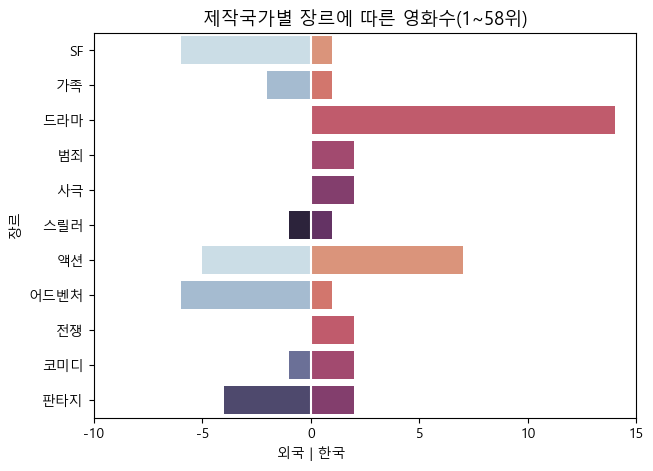

In [67]:
fig = plt.figure(figsize=(7, 5))

genre = ['SF', '가족', '드라마', '범죄', '사극', '스릴러', '액션', '어드벤처', '전쟁', '코미디', '판타지']

bar_plot = sns.barplot(x=mg[mg["국가"]=='0']["count"], y=mg[mg["국가"]=='0'].index, 
                       order=genre, data=mg, lw=0, palette=sns.color_palette("flare"))
bar_plot = sns.barplot(x=mg[mg["국가"]=='1']["count"], y=mg[mg["국가"]=='1'].index, 
                       order=genre, data=mg,lw=0, palette=sns.color_palette("ch:s=.25,rot=-.25"))

plt.xlim(-10, 15)
plt.axvline(0, color='white', linestyle='-', linewidth=1.5)

plt.title("제작국가별 장르에 따른 영화수(1~58위)", fontsize=13)
plt.xlabel("외국 | 한국                      ")

-------

In [75]:
movie_1000 = movie_nation.head(29)
movie_miss = movie_nation[29:]

In [76]:
movie_1000.head(3)

,순위,영화,장르,제작국가,국가,누적관객수
0,1,명량,"사극,액션",한국,0,17615919
1,2,극한직업,코미디,한국,0,16266338
2,3,신과함께-죄와 벌,"판타지,드라마",한국,0,14414658


In [78]:
movie_miss.head(3)

,순위,영화,장르,제작국가,국가,누적관객수
29,30,보헤미안 랩소디,드라마,미국,1,9948386
30,31,검사외전,"범죄,코미디",한국,0,9707581
31,32,엑시트,"코미디,액션",한국,0,9426960


In [74]:
movie_1000["국가"].value_counts()

0    20
1     9
Name: 국가, dtype: int64

In [79]:
movie_miss["국가"].value_counts()

0    18
1    11
Name: 국가, dtype: int64

In [81]:
gg = pd.read_csv("genre2.csv")

In [83]:
gg.columns = ["장르", "영화", "누적관객수"]

In [84]:
gg.head(3)

,장르,영화,누적관객수
0,사극,명량,17615919
1,액션,명량,17615919
2,코미디,극한직업,16266338


In [86]:
movie_nation.head(3)

,순위,영화,장르,제작국가,국가,누적관객수
0,1,명량,"사극,액션",한국,0,17615919
1,2,극한직업,코미디,한국,0,16266338
2,3,신과함께-죄와 벌,"판타지,드라마",한국,0,14414658


In [92]:
df = pd.merge(gg, movie_nation[["영화", "국가", "순위"]],left_on='영화', right_on='영화', how='left')

In [93]:
df.head(10)

,장르,영화,누적관객수,국가,순위
0,사극,명량,17615919,0,1
1,액션,명량,17615919,0,1
2,코미디,극한직업,16266338,0,2
3,판타지,신과함께-죄와 벌,14414658,0,3
4,드라마,신과함께-죄와 벌,14414658,0,3
5,드라마,국제시장,14264478,0,4
6,액션,어벤져스- 엔드게임,13977602,1,5
7,SF,어벤져스- 엔드게임,13977602,1,5
8,애니메이션,겨울왕국 2,13750668,1,6
9,액션,베테랑,13414484,0,7


In [94]:
df.to_csv("genre_nation.csv", index=False, encoding="utf-8")